# Exploratory Data Analysis
   ---
*By Tan Yu Xuan                    30 May 2023*

# Imported Libraries

In [31]:
# Importing Dataset
import os
from PIL import Image
import glob
import cv2

# Processing Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Change to nicer default style
plt.style.use('seaborn')
%matplotlib inline

The dataset was downloaded from https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database.

The objective is to determine the positive covid-19 cases based on chest x-ray images.

# Importing Dataset

In [2]:
levels = ['Normal/images', 'COVID/images', 'Viral Pneumonia/images']
path = "./data/COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)

data = []
for id, level in enumerate(levels):
    for file in os.listdir(os.path.join(data_dir, level)):
        data.append(['{}/{}'.format(level, file), level])

In [3]:
df = pd.DataFrame(data, columns=['image_file', 'label'])
df['label'] = df['label'].map({'Normal/images':'normal', 'COVID/images':'covid', 'Viral Pneumonia/images':'pneumonia'})

In [4]:
df['path'] = path + '/' + df['image_file']

In [5]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((75,75))))

# COVID-19 Radiography Dataset

In [6]:
df.head()

,image_file,label,path,image
0,Normal/images/Normal-1.png,normal,./data/COVID-19_Radiography_Dataset/Normal/ima...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,Normal/images/Normal-10.png,normal,./data/COVID-19_Radiography_Dataset/Normal/ima...,"[[9, 9, 9, 8, 8, 7, 6, 4, 3, 2, 1, 1, 1, 0, 0,..."
2,Normal/images/Normal-100.png,normal,./data/COVID-19_Radiography_Dataset/Normal/ima...,"[[0, 0, 0, 0, 12, 57, 75, 95, 111, 117, 119, 1..."
3,Normal/images/Normal-1000.png,normal,./data/COVID-19_Radiography_Dataset/Normal/ima...,"[[0, 6, 23, 51, 66, 69, 71, 67, 97, 96, 101, 1..."
4,Normal/images/Normal-10000.png,normal,./data/COVID-19_Radiography_Dataset/Normal/ima...,"[[136, 118, 106, 100, 96, 93, 91, 88, 87, 87, ..."


In [7]:
df.tail()

,image_file,label,path,image
15148,Viral Pneumonia/images/Viral Pneumonia-995.png,pneumonia,./data/COVID-19_Radiography_Dataset/Viral Pneu...,"[[5, 25, 42, 54, 62, 69, 83, 97, 110, 121, 132..."
15149,Viral Pneumonia/images/Viral Pneumonia-996.png,pneumonia,./data/COVID-19_Radiography_Dataset/Viral Pneu...,"[[44, 56, 67, 103, 115, 119, 127, 135, 139, 11..."
15150,Viral Pneumonia/images/Viral Pneumonia-997.png,pneumonia,./data/COVID-19_Radiography_Dataset/Viral Pneu...,"[[21, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8..."
15151,Viral Pneumonia/images/Viral Pneumonia-998.png,pneumonia,./data/COVID-19_Radiography_Dataset/Viral Pneu...,"[[[99, 99, 99], [110, 110, 110], [120, 120, 12..."
15152,Viral Pneumonia/images/Viral Pneumonia-999.png,pneumonia,./data/COVID-19_Radiography_Dataset/Viral Pneu...,"[[44, 48, 59, 68, 72, 70, 114, 155, 150, 120, ..."


# Missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15153 entries, 0 to 15152
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_file  15153 non-null  object
 1   label       15153 non-null  object
 2   path        15153 non-null  object
 3   image       15153 non-null  object
dtypes: object(4)
memory usage: 473.7+ KB


No missing values found.

# Duplicates

In [9]:
df.drop(columns=['image'], axis=1).nunique()

image_file    15153
label             3
path          15153
dtype: int64

There are no duplicates.

# EDA

## Label

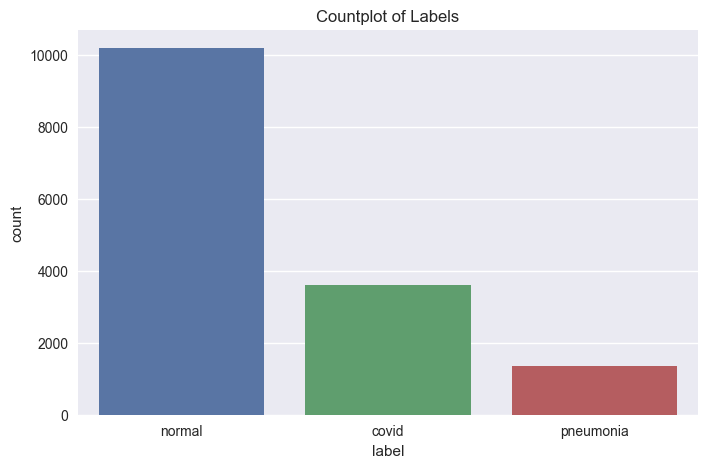

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='label').set(title='Countplot of Labels');

From the plot, we can see the dataset is imbalanced. There are more 'normal' images than both 'covid' and 'pneumonia'. Data needs to be balanced when modeling.

## Image

Randomly plot three images from each labels of the dataset to visualise lung opacity.

Typically, the lungs appear black on a CT scan or X-ray. This shows that they are free of blockages. When gray areas are visible instead, it means that something is partially filling this area inside the lungs. These gray areas are referred to as ground-glass opacity. 

Ground-glass opacity can be a sign of:
- fluid, pus, or cells filling the air space
- walls of the alveoli thickening
- space between the lungs thickening

Opacities in the lungs can be caused by a variety of both acute and chronic concerns. Some potential reasons for lung opacity include:
1. Pneumonia
2. COVID-19
3. Others such as pneumonitis, EVALI, interstitial lung disease, pulmonary edema, alveolar hemorrhage, lung cancer

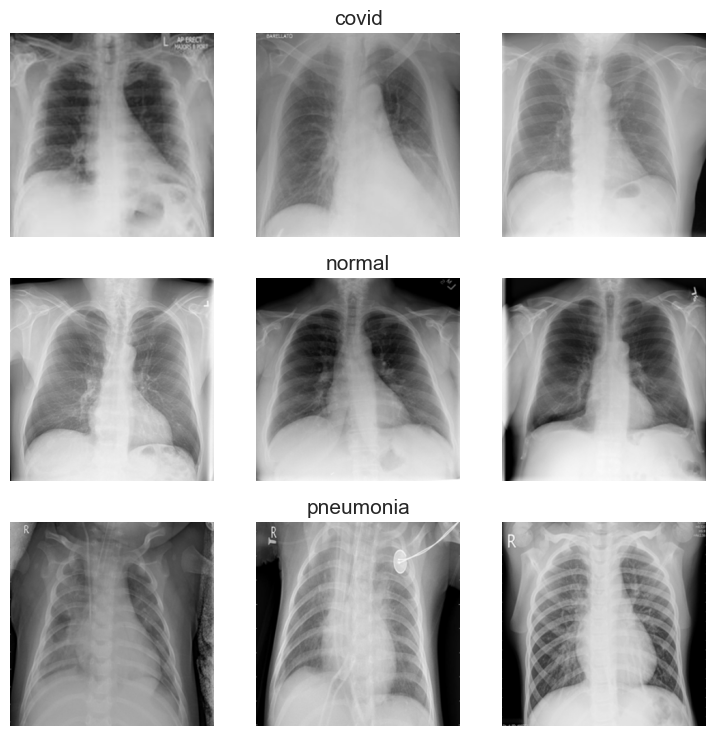

In [59]:
n_samples = 3

fig, m_axs = plt.subplots(3, n_samples, figsize = (3*n_samples, 3*3))

for n_axs, (type_name, type_rows) in zip(m_axs, df.sort_values(['label']).groupby('label')):
    n_axs[1].set_title(type_name, fontsize = 15)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state = 123).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

From the random pictures, we can see that the lung opacity for label='pneumonia' is the greatest, followed by 'covid' then 'normal'.

## Investigate single image
We are interested in label='covid, so we will be looking at an image from covid folder.

In [15]:
#load a single image of choice from selected folder

def load_image(path, img):
    if img==image_name:
        print('Image name =',img)
        image = cv2.imread(os.path.join(path, img))
        
    return image

Image name = COVID-4.png


C:\Users\Tan Yu Xuan\AppData\Local\Temp\ipykernel_24156\3723938745.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


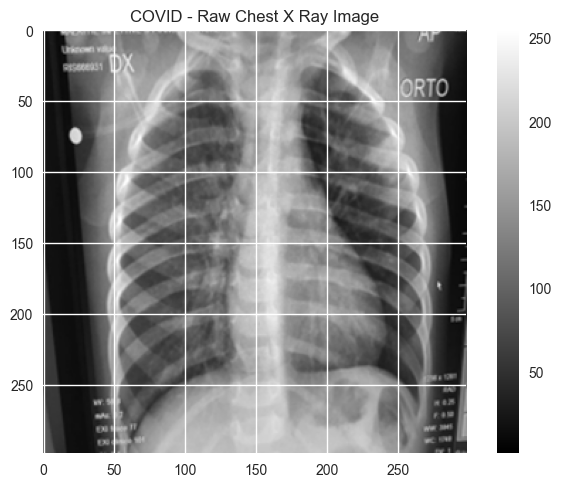

In [24]:
covid_path = "./data/COVID-19_Radiography_Dataset/COVID/images/"
image_name = "COVID-4.png"

covid_image = load_image(covid_path, image_name)
plt.imshow(covid_image, cmap='gray')
plt.colorbar()
plt.title('COVID - Raw Chest X Ray Image');

In [25]:
print(f"Image Height = {image.shape[0]}, Width = {image.shape[1]}, Dimension = {image.ndim}")
print(f"Maximum RGB value = {image.max():.4f}")
print(f"Minimum RGB value = {image.min():.4f}")
print(f"Mean RGB value = {image.mean():.4f}")
print(f"Max RGB value = {image.std():.4f}");

Image Height = 299, Width = 299, Dimension = 3
Maximum RGB value = 255.0000
Minimum RGB value = 0.0000
Mean RGB value = 146.8596
Max RGB value = 67.2132


## Augmentation
Image data augmentation used to generate new transformed versions of images from the given image dataset to increase its diversity.

In [53]:
def plot_multiple_img(img_matrix_list, title_list, ncols, main_title = ""):
    
    fig, myaxes = plt.subplots(figsize = (15, 8), nrows = 2, ncols = ncols, squeeze = False)
    fig.suptitle(main_title, fontsize = 18)
    fig.subplots_adjust(wspace = 0.3)
    fig.subplots_adjust(hspace = 0.3)
    
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        myaxes[i // ncols][i % ncols].imshow(img)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize = 15)
        myaxes[i // ncols][i % ncols].grid(False)
        
    plt.show()

In [54]:
import albumentations as A

albumentation_list = [A.RandomFog(p = 1), A.RandomBrightness(p = 1),
                      A.RandomCrop(p = 1,height = 199, width = 199), A.Rotate(p = 1, limit = 90),
                      A.RGBShift(p = 1), A.VerticalFlip(p = 1), A.RandomBrightnessContrast(p=1)]

img_matrix_list = []
bboxes_list = []
for aug_type in albumentation_list:
    img = aug_type(image = covid_image)['image']
    img_matrix_list.append(img)

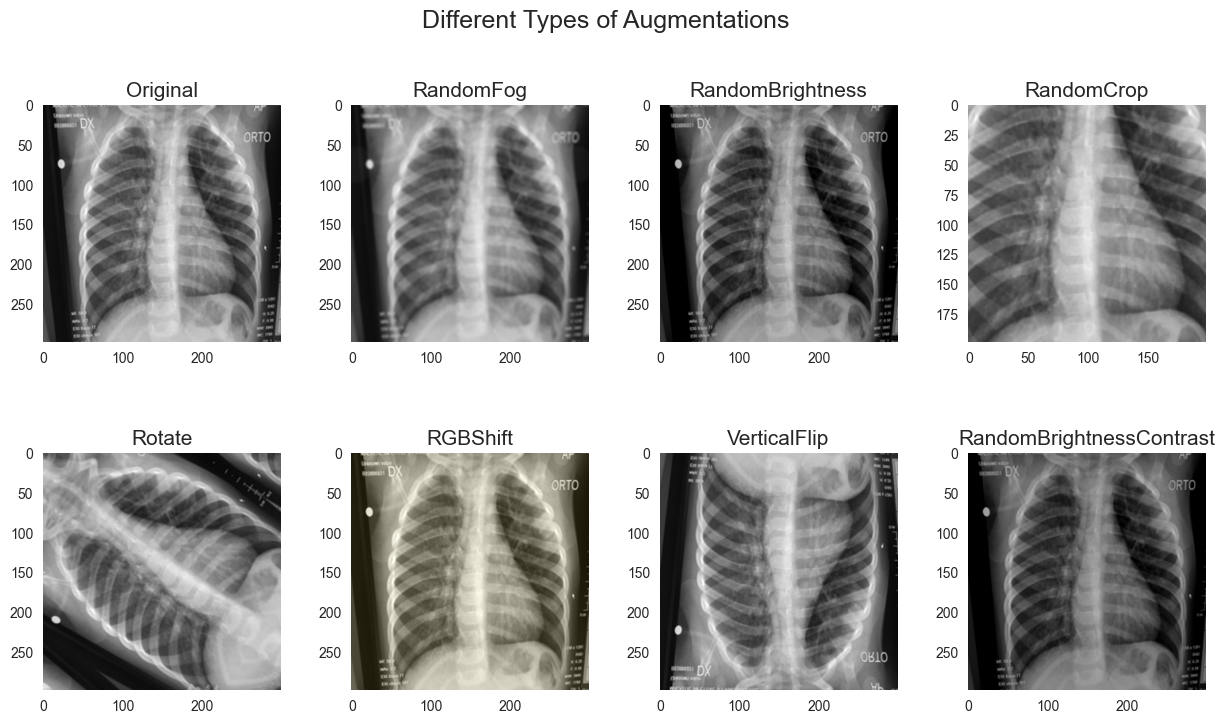

In [55]:
img_matrix_list.insert(0,covid_image)    

titles_list = ["Original", "RandomFog", "RandomBrightness", "RandomCrop", "Rotate", "RGBShift", "VerticalFlip", "RandomBrightnessContrast"]

plot_multiple_img(img_matrix_list, titles_list, ncols = 4, main_title = "Different Types of Augmentations")

## Image Value Distribution
Mean, maximum, minimum and standard deviation of the images pixels values are analysed for different labels to see the trends.

Black = 0 pixels,
White = 255 pixels.

In [139]:
mean_val = []
std_dev_val = []
max_val = []
min_val = []

for i in range(0, len(df)):
    mean_val.append(df['image'][i].mean())
    std_dev_val.append(np.std(df['image'][i]))
    max_val.append(df['image'][i].max())
    min_val.append(df['image'][i].min())

In [140]:
imageEDA = df.loc[:,['image','label','path']]
imageEDA['mean'] = mean_val
imageEDA['stedev'] = std_dev_val
imageEDA['max'] = max_val
imageEDA['min'] = min_val

imageEDA['subt_mean'] = imageEDA['mean'].mean() - imageEDA['mean']

### Mean

[Text(0.5, 1.0, 'Images Colour Mean Value Distribution by Label')]

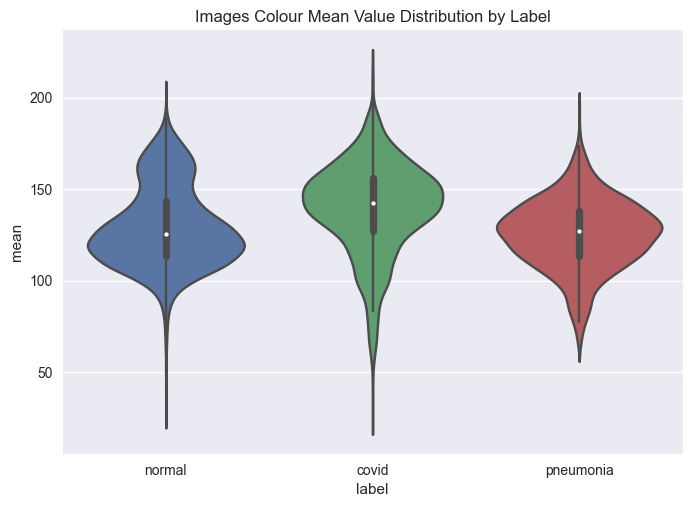

In [169]:
sns.violinplot(data=imageEDA, y='mean', x='label').set(title='Images Colour Mean Value Distribution by Label')

From the plot, we can see for label='covid', mean value at highest density is around 145 pixels which is greater than 'normal' and 'pneumonia'. 

Second place is 'pneumonia' where mean value at highest density is around 130 pixels.

Lastly, 'normal' has the lowest mean value of around 120 pixels. 

This means there are more whites for 'covid', followed by 'pneunomia' then 'normal'.

### Maximum

[Text(0.5, 1.0, 'Images Colour Max Value Distribution by Label')]

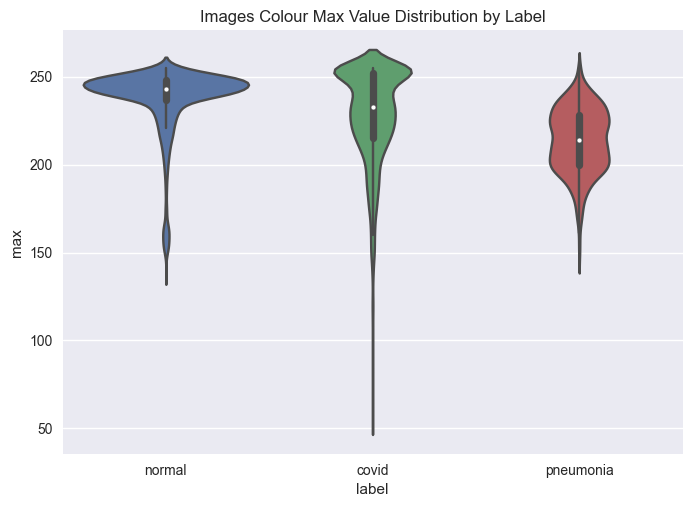

In [170]:
sns.violinplot(data=imageEDA, y='max', x='label').set(title='Images Colour Max Value Distribution by Label')

From the plot, for label='covid', max value at highest density is around 255 pixels which is greater than 'normal' and 'pneumonia'.

Second place is 'normal' where max value at highest density is around 245 pixels.

'pneumonia' with two density peaks at 230 pixels and 200 pixels is in the last place.

This means there are more whites for 'covid', followed by 'normal' then 'pneunomia'.

### Minimum

[Text(0.5, 1.0, 'Images Colour Min Value Distribution by Label')]

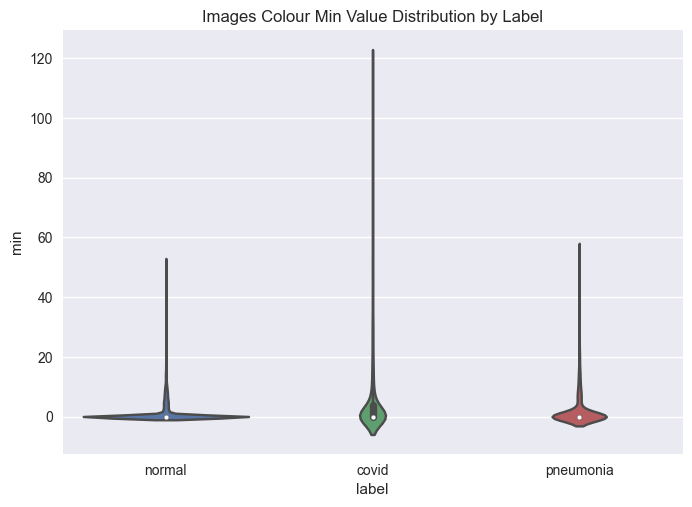

In [171]:
sns.violinplot(data=imageEDA, y='min', x='label').set(title='Images Colour Min Value Distribution by Label')

From the plot, all three labels ('covid', 'normal', 'pneumonia') has min value of 0 pixels at highest density.

However, outlier range is the widest for 'covid'.

### Standard Deviation vs Mean

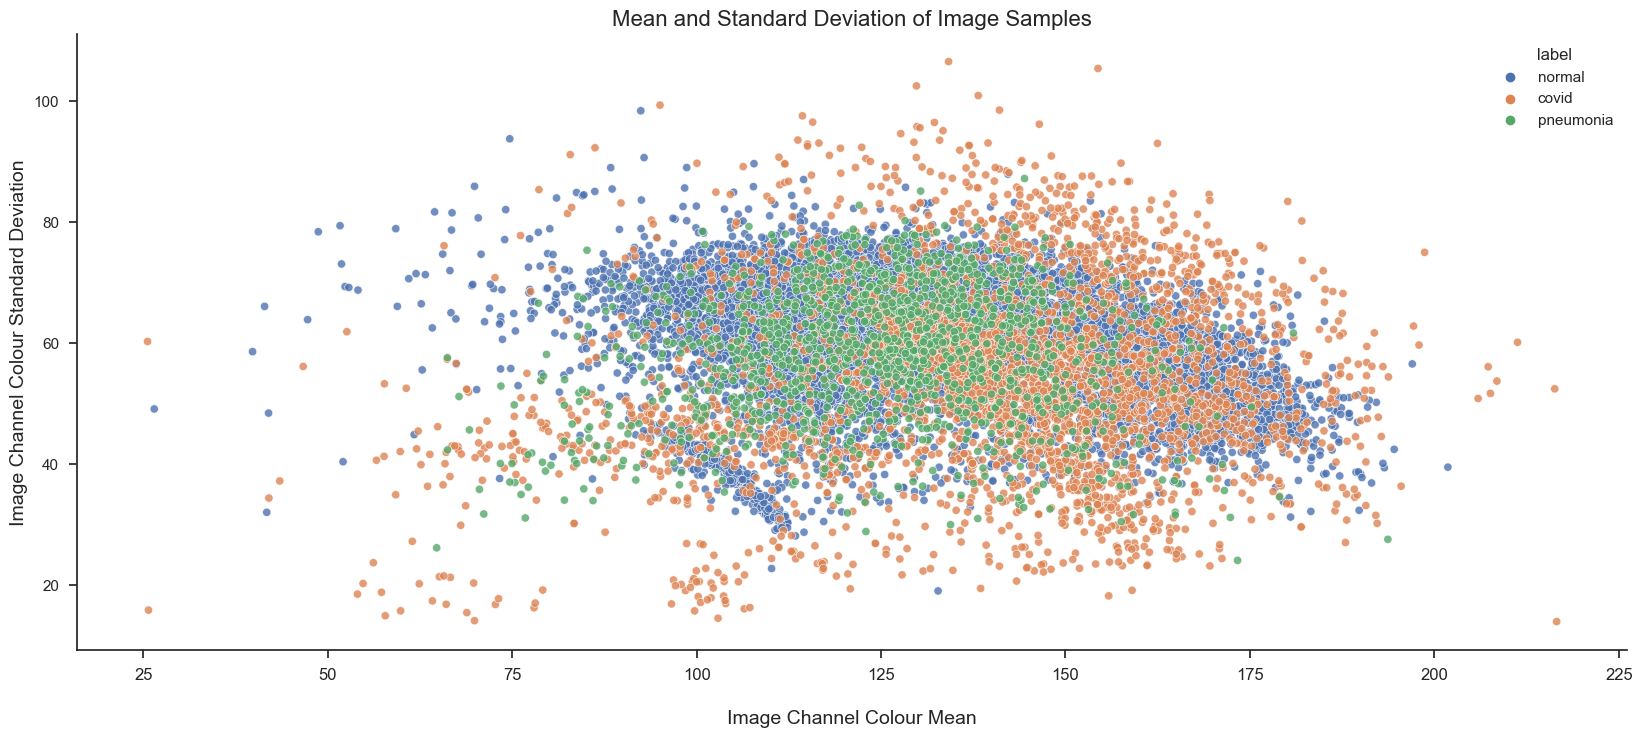

In [176]:
plt.figure(figsize = (20, 8))
sns.set(style = "ticks", font_scale = 1)
ax = sns.scatterplot(data = imageEDA, x = "mean", y = 'stedev', hue = 'label', alpha = 0.8);
sns.despine(top = True, right = True, left = False, bottom = False)
plt.xticks(rotation = 0, fontsize = 12)
ax.set_xlabel('\nImage Channel Colour Mean', fontsize = 14)
ax.set_ylabel('Image Channel Colour Standard Deviation', fontsize = 14)
plt.title('Mean and Standard Deviation of Image Samples', fontsize = 16);

From the plot, we can see label='covid' has the widest spread of both mean (concentrated around 55-190 pixels) and standard deviation (concentrated around 20-95 pixels), followed by 'normal' (approx. mean of 85-185 pixels, standard deviation of 40-80 pixels), then 'pneumonia' (approx. mean of 80-160 pixels, standard deviation of 40-80 pixels).

# Conclusion

From this EDA, lung opacity is the major factor in determining the positive covid-19 cases (label='covid') in chest x-ray images.

Looking at the random pictures, the lung opacity for 'covid' lies in between 'normal' and 'pneunomia'. 

However, the image value distribution plots suggest there are more whites for 'covid' compared to 'normal' and 'pneumonia' cases.